<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Statistical Testing (Statistical Significance)</h1>

To examine the overall variation in crop yield across different groups, ensuring that the differences observed were not due to random chance.

### **One-Way ANOVA:**
**One-Way ANOVA** (Analysis of Variance) is a statistical test used to compare the means of three or more independent groups based on a single factor. It tests the null hypothesis that all group means are equal. If the p-value is less than the chosen significance level (usually 0.05), we reject the null hypothesis and conclude that there are significant differences among the group means. One-Way ANOVA is typically used when we have one categorical independent variable with multiple levels (groups) and one continuous dependent variable.

### **Two-Way ANOVA:**
**Two-Way ANOVA** extends the One-Way ANOVA by evaluating the impact of two independent categorical variables (factors) on a continuous dependent variable, while also examining whether there is an interaction effect between these two factors. It tests three hypotheses: (1) the effect of the first factor, (2) the effect of the second factor, and (3) the interaction between the two factors. This test helps identify not only the main effects of each factor but also how they interact and jointly affect the dependent variable.

### **Kruskal-Wallis Test:**
The **Kruskal-Wallis Test** is a non-parametric alternative to One-Way ANOVA and is used when the assumptions of normality and homogeneity of variance are not met. It compares the medians of three or more independent groups and tests whether they come from the same distribution. Like ANOVA, the Kruskal-Wallis test assesses whether there are significant differences between the groups, but it does not assume a normal distribution, making it more robust in situations where data may not meet the assumptions of ANOVA. If the p-value is less than the significance threshold, it indicates that at least one of the groups is significantly different from the others.

<h2 style='font-size: 25px; color: crimson; font-family: Dubai; font-weight: 600'>Import Required Libraries</h2>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import squarify 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import stats, shapiro
print('Libraries loaded Succesfully')

Libraries loaded Succesfully


<h2 style='font-size: 25px; color: crimson; font-family: Dubai; font-weight: 600'>Import Dataset</h2>

In [18]:
df = pd.read_csv('Datasets/Hypothesis 101.csv')
df.head()

,Fertilizer,Yield (tones/ha),Days to Maturity,Biomass,Dry matter,Irrigation
0,C,3.8875e+01,6.2618e+00,2.5257e+00,7.5437e+01,Furrow Irrigation
1,A,2.9921e+01,7.1942e+00,2.5941e+00,5.1828e+01,Sprinkler Irrigation
2,C,4.1152e+01,7.3300e+00,3.7604e+00,4.9059e+01,Drip Irrigation
3,C,4.2162e+01,7.1378e+00,3.3403e+00,4.6779e+01,Furrow Irrigation
4,A,3.6716e+01,6.6153e+00,3.7017e+00,5.7818e+01,Furrow Irrigation


<h2 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Normality test for numerical variables</h2>

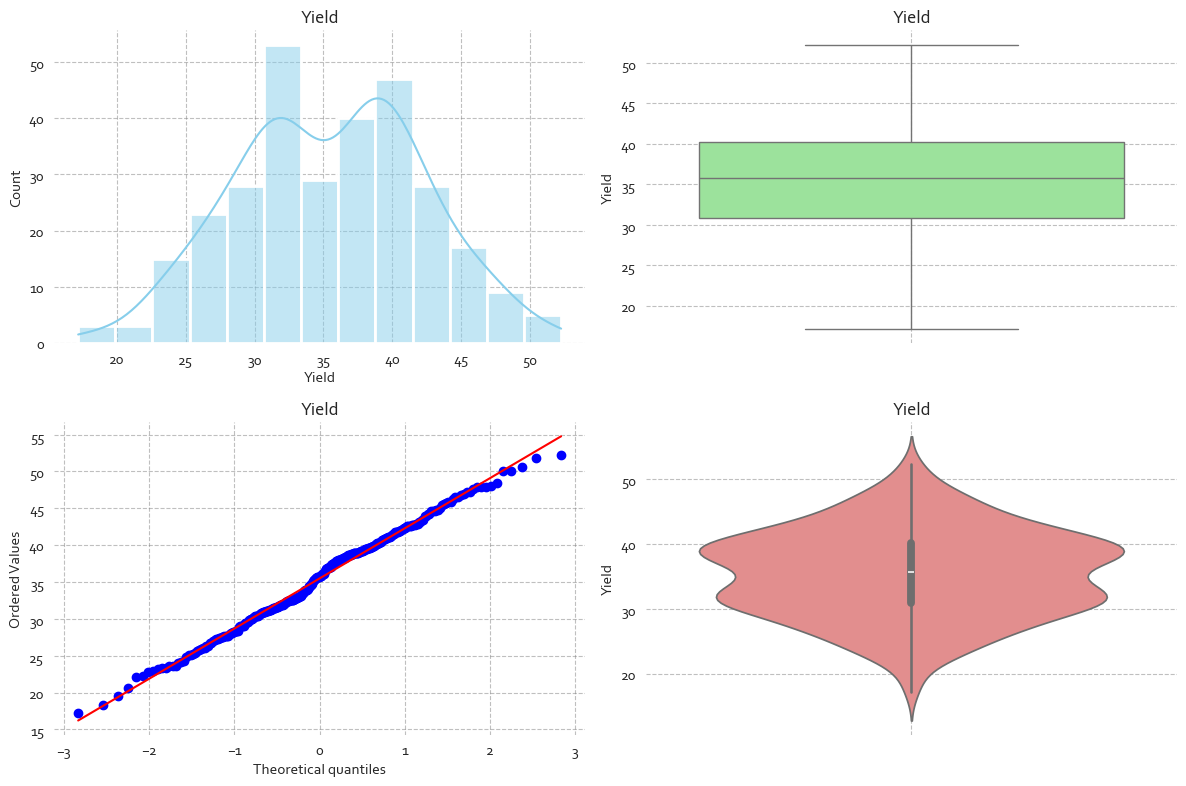

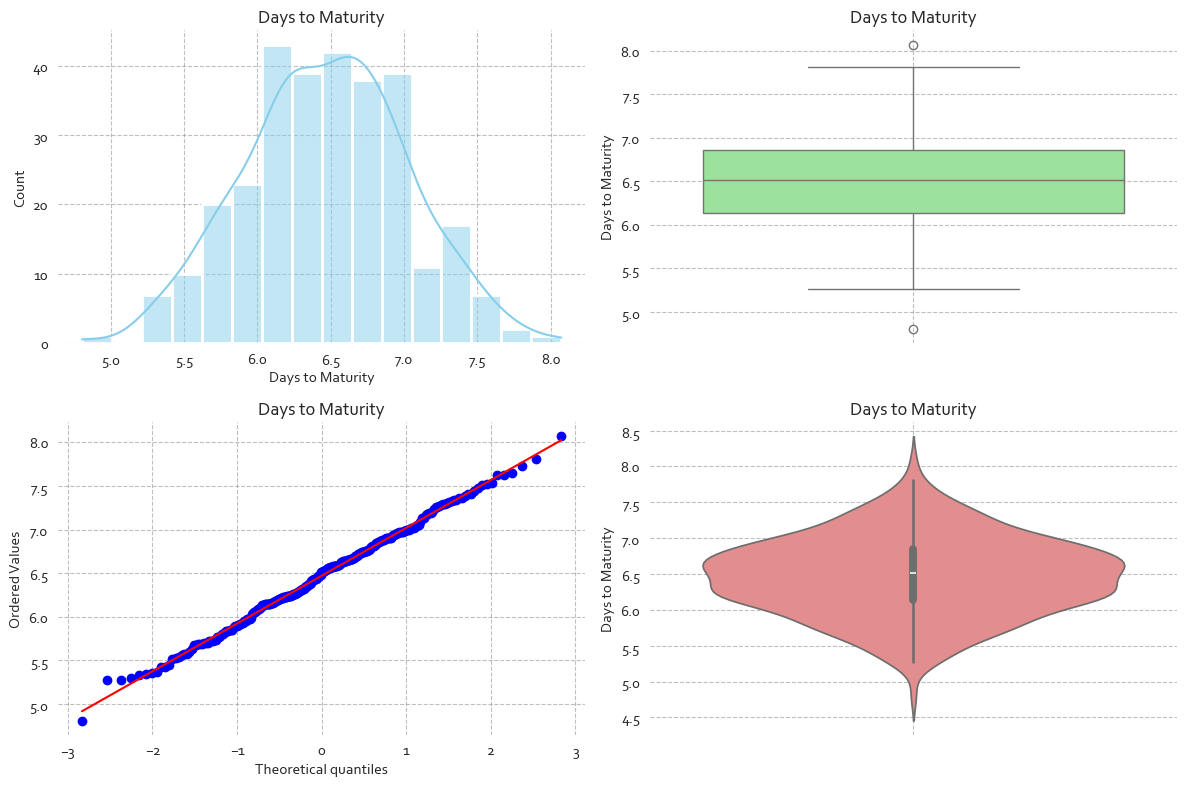

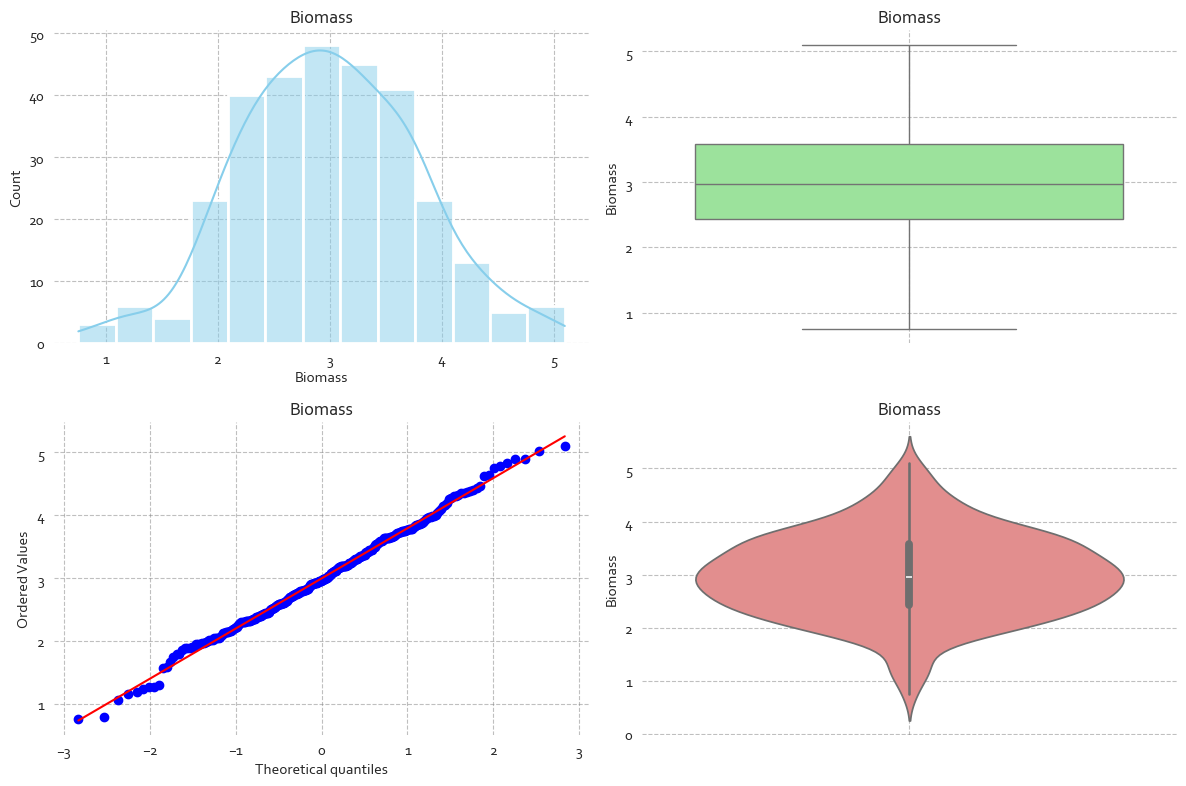

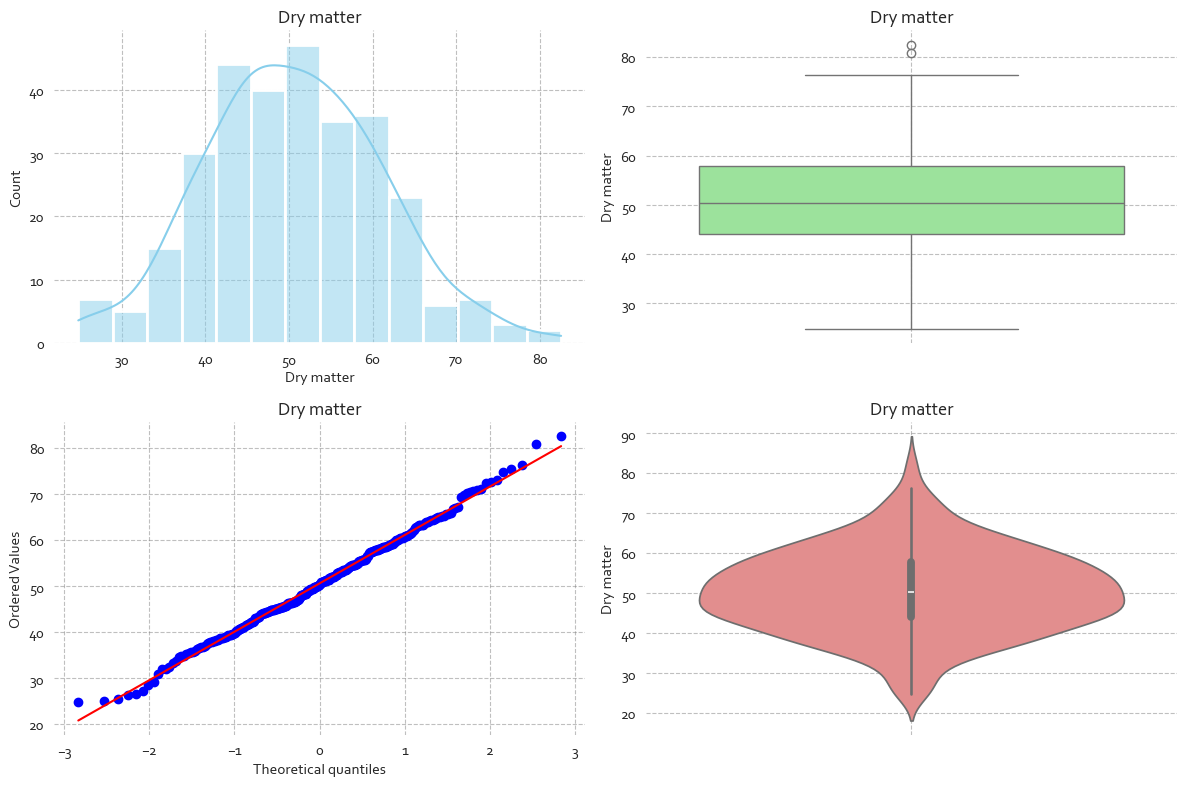

In [25]:
def plot_distribution_overview(data, column, figsize=(12, 8)):
    import scipy.stats as stats
    sns.set_style("whitegrid", {'grid.linestyle': '--'})
    plt.rcParams.update({'font.family': 'Corbel','font.size': 11})
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    
    # Histogram with KDE
    sns.histplot(data=data, x=column, kde=True, ax=ax1, color='skyblue', linewidth=2)
    ax1.set_title(f'{column}')
    ax1.grid(True, linestyle='--', color='gray', alpha=0.5)
    
    # Box plot
    sns.boxplot(data=data, y=column, ax=ax2, color='lightgreen')
    ax2.set_title(f'{column}')
    ax2.grid(True, linestyle='--', color='gray', alpha=0.5)
    
    # Q-Q plot
    stats.probplot(data[column], dist="norm", plot=ax3)
    ax3.set_title(f'{column}')
    ax3.grid(True, linestyle='--', color='gray', alpha=0.5)
    
    # Violin plot
    sns.violinplot(data=data, y=column, ax=ax4, color='lightcoral')
    ax4.set_title(f'{column}')
    ax4.grid(True, linestyle='--', color='gray', alpha=0.5)

    # Remove spines
    for ax in [ax1, ax2, ax3, ax4]:
        for spine in ax.spines.values():
            spine.set_visible(False)

    plt.tight_layout()
    plt.show()

# Apply the function to all numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    plot_distribution_overview(df, col, figsize=(12, 8))

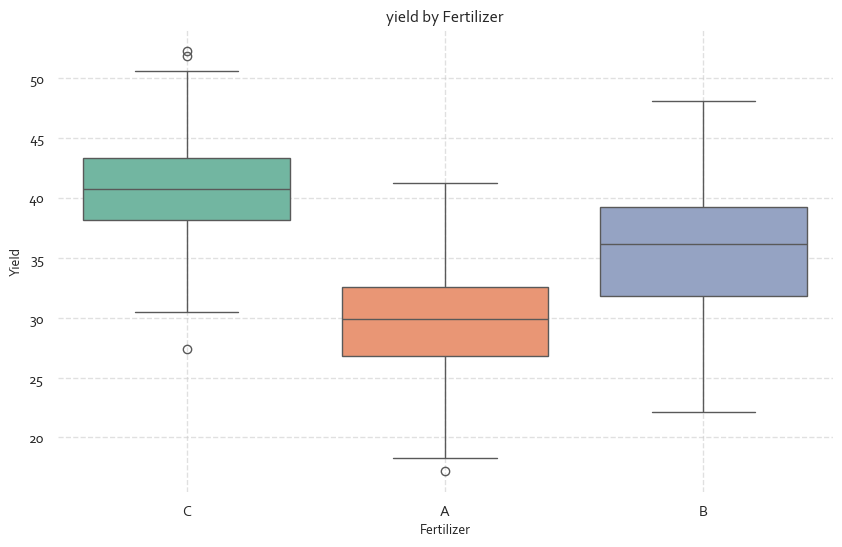

In [31]:
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Fertilizer', y='Yield', hue='Fertilizer', data=df, palette="Set2")
plt.title('yield by Fertilizer', fontsize=12)
plt.xlabel('Fertilizer', fontsize=10)
plt.ylabel('Yield', fontsize=10)
plt.grid(linestyle='--', alpha=0.6)
for spine in ax.spines.values():
        spine.set_visible(False)
    
#plt.savefig('../Results/Figures/AB102000000004.png', dpi=900)
plt.show()

In [19]:
def ShapirowilkTest(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    results = []
    for col in numerical_cols:
        stat, p_value = shapiro(df[col])
        results.append({
            'Variable': col,
            'Statistic': stat,
            'P-Value': p_value,
            'Normality': 'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'
        })
    return pd.DataFrame(results)

shapiro_results = ShapirowilkTest(df)
shapiro_results = shapiro_results.style.format({'Statistic': '{:.4f}', 'P-Value': '{:.3f}' })
shapiro_results

,Variable,Statistic,P-Value,Normality
0,Yield (tones/ha),0.9931,0.187,Normally Distributed
1,Days to Maturity,0.9973,0.910,Normally Distributed
2,Biomass,0.9959,0.619,Normally Distributed
3,Dry matter,0.9961,0.675,Normally Distributed


<h2 style='font-size: 25px; color: crimson; font-family: Dubai; font-weight: 600'>Homogeneity of Varience (Levanes Test)</h2>

The Levene's test is used to assess the homogeneity of variances across groups. Below is the Python code to perform Levene's test for all numerical variables in a DataFrame (df) and return the results in a formatted pandas DataFrame for easy comparison.

In [26]:
df

,Fertilizer,Yield,Days to Maturity,Biomass,Dry matter,Irrigation
0,C,3.8875e+01,6.2618e+00,2.5257e+00,7.5437e+01,Furrow Irrigation
1,A,2.9921e+01,7.1942e+00,2.5941e+00,5.1828e+01,Sprinkler Irrigation
2,C,4.1152e+01,7.3300e+00,3.7604e+00,4.9059e+01,Drip Irrigation
3,C,4.2162e+01,7.1378e+00,3.3403e+00,4.6779e+01,Furrow Irrigation
4,A,3.6716e+01,6.6153e+00,3.7017e+00,5.7818e+01,Furrow Irrigation
...,...,...,...,...,...,...
295,B,4.0715e+01,6.0388e+00,3.8507e+00,3.9203e+01,Furrow Irrigation
296,B,3.2906e+01,7.2606e+00,2.0170e+00,5.8855e+01,Sprinkler Irrigation
297,B,4.2275e+01,7.1741e+00,3.1702e+00,5.7891e+01,Furrow Irrigation
298,B,3.6858e+01,6.1335e+00,1.7475e+00,5.0790e+01,Furrow Irrigation


In [20]:
from scipy.stats import levene

def LevenesTest(df, group_col):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference([group_col])
    results = []
    for col in numerical_cols:
        grouped_data = [group[col].values for _, group in df.groupby(group_col)]
        stat, p_value = levene(*grouped_data)
        results.append({'Variable': col, 'Statistic': stat, 'P-Value': p_value, 'Homogeneity': 'Homogeneous Varience' if p_value > 0.05 else 'Not Homogeneous Varience'})
    return pd.DataFrame(results)
    
levene_results = LevenesTest(df, group_col='Fertilizer')
levene_results = levene_results.style.format({'Statistic': '{:.2f}', 'P-Value': '{:.4f}'})
levene_results

,Variable,Statistic,P-Value,Homogeneity
0,Biomass,0.66,0.5171,Homogeneous Varience
1,Days to Maturity,0.65,0.5240,Homogeneous Varience
2,Dry matter,0.12,0.8900,Homogeneous Varience
3,Yield (tones/ha),1.96,0.1429,Homogeneous Varience


<h2 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>ONE WAY ANOVA and Kruskall walis Tests</h2>

In [21]:
from scipy.stats import f_oneway, kruskal

def compare_numerical_columns(data, group_column, numerical_columns):
    results = []
    for column in numerical_columns:
        grouped_data = [group[column].values for _, group in data.groupby(group_column)]
        anova_result = f_oneway(*grouped_data)
        kruskal_result = kruskal(*grouped_data)
        
        anova_interpretation = "Significant difference" if anova_result.pvalue < 0.05 else "No significant difference"
        kruskal_interpretation = "Significant difference" if kruskal_result.pvalue < 0.05 else "No significant difference"

        # Append results
        results.append({
            "Column": column,
            "Test": "ANOVA",
            "Statistic": anova_result.statistic,
            "p-value": anova_result.pvalue,
            "Interpretation": anova_interpretation
        })
        results.append({
            "Column": column,
            "Test": "Kruskal-Wallis",
            "Statistic": kruskal_result.statistic,
            "p-value": kruskal_result.pvalue,
            "Interpretation": kruskal_interpretation
        })

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return results_df

# List of numerical columns
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

# Perform the tests and get results
test_results_df = compare_numerical_columns(df, group_column="Fertilizer", numerical_columns=numerical_columns)

# Display the results
test_results_df.style.set_caption("Statistical Test Results Across Numerical Columns").format({"Statistic": "{:.4f}", "p-value": "{:.4e}"})

,Column,Test,Statistic,p-value,Interpretation
0,Yield (tones/ha),ANOVA,118.6065,1.3764e-38,Significant difference
1,Yield (tones/ha),Kruskal-Wallis,137.8156,1.1850e-30,Significant difference
2,Days to Maturity,ANOVA,0.9600,3.8408e-01,No significant difference
3,Days to Maturity,Kruskal-Wallis,1.9310,3.8079e-01,No significant difference
4,Biomass,ANOVA,0.6271,5.3486e-01,No significant difference
5,Biomass,Kruskal-Wallis,1.4984,4.7275e-01,No significant difference
6,Dry matter,ANOVA,0.4681,6.2666e-01,No significant difference
7,Dry matter,Kruskal-Wallis,1.1426,5.6478e-01,No significant difference


In [23]:
df = df.rename(columns={'Yield (tones/ha)': 'Yield'})

<h2 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Two-Way ANOVA</h2>

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

def two_way_anova_with_interaction(data, response_column, factor1, factor2):
    formula = f"{response_column} ~ C({factor1}) + C({factor2}) + C({factor1}):C({factor2})"
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA for interaction
    
    return anova_table

# Perform two-way ANOVA
response_column = "Yield"
factor1 = "Fertilizer"
factor2 = "Irrigation"

# Function call
anova_results = two_way_anova_with_interaction(df, response_column, factor1, factor2)

# Display results
print("Two-Way ANOVA Results with Interaction:")
anova_results

Two-Way ANOVA Results with Interaction:


,sum_sq,df,F,PR(>F)
C(Fertilizer),5.8101e+03,2.0000e+00,1.1396e+02,3.4804e-37
C(Irrigation),9.0674e+01,3.0000e+00,1.1856e+00,3.1546e-01
C(Fertilizer):C(Irrigation),2.1639e+02,6.0000e+00,1.4147e+00,2.0871e-01
Residual,7.3420e+03,2.8800e+02,NaN,NaN


<h2 style='font-size: 25px; color: crimson; font-family: Dubai; font-weight: 600'>Automate for Multiple Values in df</h2>

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

def two_way_anova_all(data, numerical_columns, factor1, factor2):
    results = []
    
    for response_column in numerical_columns:
        # Rename column if it contains special characters
        safe_column_name = response_column.replace("(", "").replace(")", "").replace("/", "").replace(" ", "_")
        data = data.rename(columns={response_column: safe_column_name})
        
        # Build the formula for two-way ANOVA with interaction
        formula = f"{safe_column_name} ~ C({factor1}) + C({factor2}) + C({factor1}):C({factor2})"
        
        # Fit the model
        model = ols(formula, data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        
        # Add the results to the list with variable name
        for source, row in anova_table.iterrows():
            p_value = row["PR(>F)"]
            interpretation = "Significant difference" if p_value < 0.05 else "No significant difference"
            
            results.append({
                "Variable": response_column,
                "Source": source,
                "Sum Sq": row["sum_sq"],
                "df": row["df"],
                "F-Value": row["F"],
                "p-Value": p_value,
                "Interpretation": interpretation
            })
    
    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Define factors and numerical columns
factor1 = "Fertilizer"
factor2 = "Irrigation"
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns

# Perform the two-way ANOVA for all numerical columns
anova_results_df = two_way_anova_all(df, numerical_columns, factor1, factor2)

# Display results
pd.set_option("display.float_format", "{:.4e}".format)  # Format p-values
print("Two-Way ANOVA Results Across All Numerical Variables:")
#anova_results_df.to_csv("anova_results.csv", index=False)
anova_results_df

Two-Way ANOVA Results Across All Numerical Variables:


,Variable,Source,Sum Sq,df,F-Value,p-Value,Interpretation
0,Yield,C(Fertilizer),5.8101e+03,2.0000e+00,1.1396e+02,3.4804e-37,Significant difference
1,Yield,C(Irrigation),9.0674e+01,3.0000e+00,1.1856e+00,3.1546e-01,No significant difference
2,Yield,C(Fertilizer):C(Irrigation),2.1639e+02,6.0000e+00,1.4147e+00,2.0871e-01,No significant difference
3,Yield,Residual,7.3420e+03,2.8800e+02,NaN,NaN,No significant difference
4,Days to Maturity,C(Fertilizer),6.3462e-01,2.0000e+00,1.0561e+00,3.4914e-01,No significant difference
5,Days to Maturity,C(Irrigation),3.5215e-01,3.0000e+00,3.9071e-01,7.5978e-01,No significant difference
6,Days to Maturity,C(Fertilizer):C(Irrigation),2.0057e+00,6.0000e+00,1.1126e+00,3.5490e-01,No significant difference
7,Days to Maturity,Residual,8.6528e+01,2.8800e+02,NaN,NaN,No significant difference
8,Biomass,C(Fertilizer),1.0339e+00,2.0000e+00,8.1322e-01,4.4444e-01,No significant difference
9,Biomass,C(Irrigation),2.5769e+00,3.0000e+00,1.3513e+00,2.5798e-01,No significant difference
